In [50]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np
import pickle
from sqlalchemy import create_engine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from data.load_data_from_sql import connect_to_database, read_sql_to_dataframe, close_connection
from scripts.cleaner import DataCleaner
from scripts.utils import Utils

cleaner = DataCleaner()
utility = Utils()
%matplotlib inline

In [12]:
# Function to add the project path to sys.path
def add_project_path():
    """Add the project path to sys.path."""
    project_path = 'C:\\Users\\user\\Desktop\\10 acc\\Week 1\\User-Analytics-in-Telecom-Industry'
    sys.path.append(project_path)

In [13]:
# Function to perform the main analysis
def main_analysis():
    """Main function to execute your analysis."""
    # Add the project path to sys.path
    add_project_path()

    db_params = {
        'dbname': 'week-1',
        'user': 'postgres',
        'password': 'postgres',
        'host': 'localhost',
        'port': '5432',
    }

    # Example query
    query = "SELECT * FROM cleaned_telecom_data;"

    # Connect to the database
    conn = connect_to_database(db_params)

    # Read results into a Pandas DataFrame
    cleaned_df = read_sql_to_dataframe(conn, query)

    # Close the database connection
    close_connection(conn)


    # return the DataFrame
    return cleaned_df

In [14]:
# Call the main analysis function
cleaned_df = main_analysis()
cleaned_df.head()

INFO:data.load_data_from_sql:connect_to_database executed successfully.
C:\Users\user\Desktop\10 acc\Week 1\User-Analytics-in-Telecom-Industry\data\load_data_from_sql.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
INFO:data.load_data_from_sql:read_sql_to_dataframe executed successfully.
INFO:data.load_data_from_sql:close_connection executed successfully.


,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [15]:
cleaned_df.rename(columns={"msisdn/number":"msisdn"},inplace=True)
cleaned_df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
       

In [16]:
user_experience_df = cleaned_df[['msisdn', 'handset_type','avg_rtt_dl_(ms)','avg_rtt_ul_(ms)','avg_bearer_tp_dl_(kbps)','avg_bearer_tp_ul_(kbps)','tcp_dl_retrans._vol_(bytes)','tcp_ul_retrans._vol_(bytes)']]
user_experience_df.head() 

,msisdn,handset_type,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),tcp_dl_retrans._vol_(bytes),tcp_ul_retrans._vol_(bytes)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.0,5.0,23.0,44.0,568730.0,20949.5
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.0,5.0,16.0,26.0,568730.0,20949.5
2,3.376063e+10,Samsung Galaxy A8 (2018),45.0,5.0,6.0,9.0,568730.0,20949.5
3,3.375034e+10,undefined,45.0,5.0,44.0,44.0,568730.0,20949.5
4,3.369980e+10,Samsung Sm-G390F,45.0,5.0,6.0,9.0,568730.0,20949.5


In [17]:
total_rtt=user_experience_df['avg_rtt_dl_(ms)']+user_experience_df['avg_rtt_ul_(ms)']
total_tp=user_experience_df['avg_bearer_tp_dl_(kbps)']+user_experience_df['avg_bearer_tp_ul_(kbps)']
total_tcp=user_experience_df['tcp_dl_retrans._vol_(bytes)']+user_experience_df['tcp_ul_retrans._vol_(bytes)']
user_experience_total=pd.DataFrame({"msisdn":user_experience_df['msisdn'],"handset_type":user_experience_df['handset_type'],"total_rtt(ms)":total_rtt,"total_tp(kbps)":total_tp,"total_tcp(bytes)":total_tcp})
user_experience_total2=user_experience_total.copy()
user_experience_total.head()

,msisdn,handset_type,total_rtt(ms),total_tp(kbps),total_tcp(bytes)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,47.0,67.0,589679.5
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),70.0,42.0,589679.5
2,3.376063e+10,Samsung Galaxy A8 (2018),50.0,15.0,589679.5
3,3.375034e+10,undefined,50.0,88.0,589679.5
4,3.369980e+10,Samsung Sm-G390F,50.0,15.0,589679.5


### Task 4
#### Task 4.1 
Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
* Average TCP retransmission
* Average RTT
* Handset type
* Average throughput


In [18]:
customer_group=user_experience_total.groupby(['msisdn'])

avg_tcp_retran=customer_group.agg({'total_tcp(bytes)':'mean'})
avg_tcp_retran.rename(columns={'total_tcp(bytes)':'avg_tcp(bytes)'},inplace=True)
avg_tcp_retran

,avg_tcp(bytes)
msisdn,
3.360100e+10,589679.50
3.360100e+10,589679.50
3.360100e+10,589679.50
3.360101e+10,22015.50
3.360101e+10,4980255.75
...,...
3.379000e+10,218045.00
3.379000e+10,589679.50
3.197021e+12,589679.50


In [19]:
avg_rtt=customer_group.agg({'total_rtt(ms)':'mean'})
avg_rtt.rename(columns={'total_rtt(ms)':'avg_rtt(ms)'},inplace=True)
avg_rtt

,avg_rtt(ms)
msisdn,
3.360100e+10,46.0
3.360100e+10,31.0
3.360100e+10,50.0
3.360101e+10,84.0
3.360101e+10,59.5
...,...
3.379000e+10,52.0
3.379000e+10,40.0
3.197021e+12,50.0


In [20]:
freq_handset=customer_group.agg({'handset_type':pd.Series.mode})
freq_handset.rename(columns={'handset_type':'freq_handset_type'},inplace=True)
freq_handset

,freq_handset_type
msisdn,
3.360100e+10,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,Apple iPhone 7 (A1778)
3.360100e+10,undefined
3.360101e+10,Apple iPhone 5S (A1457)
3.360101e+10,Apple iPhone Se (A1723)
...,...
3.379000e+10,Huawei Honor 9 Lite
3.379000e+10,Apple iPhone 8 Plus (A1897)
3.197021e+12,Quectel Wireless. Quectel Ec25-E


In [21]:
avg_tp=customer_group.agg({'total_tp(kbps)':'mean'})
avg_tp.rename(columns={'total_tp(kbps)':'avg_tp(kbps)'},inplace=True)
avg_tp

,avg_tp(kbps)
msisdn,
3.360100e+10,76.0
3.360100e+10,99.0
3.360100e+10,97.0
3.360101e+10,248.0
3.360101e+10,28422.0
...,...
3.379000e+10,10365.0
3.379000e+10,116.0
3.197021e+12,1.0


In [22]:
experience_by_customer=avg_rtt.copy()
experience_by_customer["avg_tp(kbps)"]=avg_tp
experience_by_customer["avg_tcp(bytes)"]=avg_tcp_retran
experience_by_customer

,avg_rtt(ms),avg_tp(kbps),avg_tcp(bytes)
msisdn,,,
3.360100e+10,46.0,76.0,589679.50
3.360100e+10,31.0,99.0,589679.50
3.360100e+10,50.0,97.0,589679.50
3.360101e+10,84.0,248.0,22015.50
3.360101e+10,59.5,28422.0,4980255.75
...,...,...,...
3.379000e+10,52.0,10365.0,218045.00
3.379000e+10,40.0,116.0,589679.50
3.197021e+12,50.0,1.0,589679.50


#### Task 4.2
Compute & list 10 of the top, bottom and most frequent:
* TCP values in the dataset. 
* RTT values in the dataset.
* Throughput values in the dataset.

In [23]:
# Top 10 TCP
print("Top 10 TCP")
top_10_tcp = avg_tcp_retran.sort_values(by=["avg_tcp(bytes)"], ascending=False).head(10)
display(top_10_tcp)

# Top 10 RTT
print("\nTop 10 RTT")
top_10_rtt = avg_rtt.sort_values(by=["avg_rtt(ms)"], ascending=False).head(10)
display(top_10_rtt)

# Top 10 TP
print("\nTop 10 TP")
top_10_tp = avg_tp.sort_values(by=["avg_tp(kbps)"], ascending=False).head(10)
display(top_10_tp)

Top 10 TCP


,avg_tcp(bytes)
msisdn,
3.369858e+10,4.301477e+09
3.365871e+10,4.288121e+09
3.366491e+10,4.268647e+09
3.365863e+10,4.254660e+09
3.366613e+10,4.211258e+09
3.366877e+10,4.166595e+09
3.366131e+10,4.137938e+09
3.366240e+10,4.117805e+09
3.366682e+10,3.968121e+09



Top 10 RTT


,avg_rtt(ms)
msisdn,
3.366232e+10,96924.0
3.368369e+10,54848.0
3.366087e+10,32335.0
3.376094e+10,27278.0
3.360679e+10,26300.0
3.367182e+10,25715.0
3.378187e+10,25388.0
3.378401e+10,24738.0
3.369855e+10,23010.5



Top 10 TP


,avg_tp(kbps)
msisdn,
3.365991e+10,283931.0
3.366268e+10,265724.0
3.366566e+10,265176.5
3.366349e+10,254950.0
3.362795e+10,238982.0
3.362118e+10,235365.0
3.378240e+10,230982.0
3.365148e+10,228303.0
3.376033e+10,227334.0


In [28]:
# Function to adjust y-values
def adjust_y_values(value):
    return value / 1e3  # Dividing by a smaller number to increase the height

# Top 10 TCP
top_10_tcp = avg_tcp_retran.sort_values(by=["avg_tcp(bytes)"], ascending=False).head(10)

# Adjust y-values
top_10_tcp['avg_tcp(bytes)'] = top_10_tcp['avg_tcp(bytes)']/1e5

fig_tcp = px.bar(top_10_tcp, x=top_10_tcp.index, y='avg_tcp(bytes)',
                 labels={'avg_tcp(bytes)': 'Average TCP Bytes'},
                 title='Top 10 TCP - Average TCP Bytes')
fig_tcp.update_layout(bargap=0.2)  # Adjust the bargap as needed
fig_tcp.show()

# Top 10 RTT
top_10_rtt = avg_rtt.sort_values(by=["avg_rtt(ms)"], ascending=False).head(10)

fig_rtt = px.bar(top_10_rtt, x=top_10_rtt.index, y='avg_rtt(ms)',
                 labels={'avg_rtt(ms)': 'Average RTT (ms)'},
                 title='Top 10 RTT - Average RTT (ms)')
fig_rtt.update_layout(bargap=0.2)  # Adjust the bargap as needed
fig_rtt.show()

# Top 10 TP
top_10_tp = avg_tp.sort_values(by=["avg_tp(kbps)"], ascending=False).head(10)

fig_tp = px.bar(top_10_tp, x=top_10_tp.index, y='avg_tp(kbps)',
                labels={'avg_tp(kbps)': 'Average Throughput (kbps)'},
                title='Top 10 TP - Average Throughput (kbps)')
fig_tp.update_layout(bargap=0.2)  # Adjust the bargap as needed
fig_tp.show()

In [25]:
top_10_tcp

,avg_tcp(bytes)
msisdn,
3.369858e+10,4301477.439
3.365871e+10,4288120.860
3.366491e+10,4268647.350
3.365863e+10,4254659.643
3.366613e+10,4211257.819
3.366877e+10,4166594.973
3.366131e+10,4137937.737
3.366240e+10,4117804.973
3.366682e+10,3968120.596


In [30]:
print("Bottom 10 TCP")
bottom_10_tcp=avg_tcp_retran.sort_values(by=["avg_tcp(bytes)"],ascending=False).tail(10)
display(bottom_10_tcp)

print("Bottom 10 RTT")
bottom_10_rtt=avg_rtt.sort_values(by=["avg_rtt(ms)"],ascending=False).tail(10)
display(bottom_10_rtt)

print("Bottom 10 TP")
bottom_10_tp=avg_tp.sort_values(by=["avg_tp(kbps)"],ascending=False).tail(10)
display(bottom_10_tp)

Bottom 10 TCP


,avg_tcp(bytes)
msisdn,
3.369969e+10,182.0
3.367937e+10,179.0
3.378420e+10,177.0
3.365068e+10,176.0
3.376964e+10,176.0
3.360783e+10,143.0
3.362636e+10,134.0
3.376206e+10,129.0
3.361478e+10,128.0


Bottom 10 RTT


,avg_rtt(ms)
msisdn,
3.363468e+10,10.0
3.361085e+10,9.0
3.367220e+10,9.0
3.364768e+10,8.0
3.366862e+10,6.0
3.365949e+10,5.0
3.369505e+10,4.0
3.366020e+10,2.0
3.366158e+10,0.0


Bottom 10 TP


,avg_tp(kbps)
msisdn,
3.363143e+10,0.0
3.367247e+10,0.0
3.363144e+10,0.0
3.366560e+10,0.0
3.363306e+10,0.0
3.367056e+10,0.0
3.365873e+10,0.0
3.363359e+10,0.0
3.363392e+10,0.0


In [31]:
print("10 top frequent TCP")
display(avg_tcp_retran.value_counts().sort_values(ascending=False).head(10))

print("10 top frequent RTT")
display(avg_rtt.value_counts().sort_values(ascending=False).head(10))

print("10 top frequent TP")
display(avg_tp.value_counts().sort_values(ascending=False).head(10))

10 top frequent TCP


avg_tcp(bytes)
589679.50         55974
570024.00           367
570060.00           167
22279.50            145
579851.75            82
570048.00            81
21041.50             78
23609.50             78
20987.50             70
571390.00            65
dtype: int64

10 top frequent RTT


avg_rtt(ms)
50.0           19545
29.0            2950
39.0            2409
38.0            1657
40.0            1642
30.0            1577
28.0            1457
49.0            1391
41.0            1260
31.0            1190
dtype: int64

10 top frequent TP


avg_tp(kbps)
15.0            2872
63.0            2138
97.0            1094
90.0            1062
98.0            1025
96.0             938
99.0             918
89.0             881
91.0             864
95.0             856
dtype: int64

#### Task 4.3
Task 4.3 - Compute & report:
* The distribution of the average throughput  per handset type and provide interpretation for your findings.
* The average TCP retransmission view per handset type and provide interpretation for your findings.


In [32]:
avg_by_handset_type=user_experience_total.groupby('handset_type').agg({'total_tp(kbps)':'mean','total_tcp(bytes)':'mean','total_rtt(ms)':'mean'})


display(avg_by_handset_type.head())

,total_tp(kbps),total_tcp(bytes),total_rtt(ms)
handset_type,,,
A-Link Telecom I. Cubot A5,23510.0,589679.5,42.0
A-Link Telecom I. Cubot Note Plus,6699.0,616213.0,1589.0
A-Link Telecom I. Cubot Note S,8937.0,41411731.0,890.0
A-Link Telecom I. Cubot Nova,56217.0,137170.0,44.0
A-Link Telecom I. Cubot Power,69468.0,8041.0,43.0


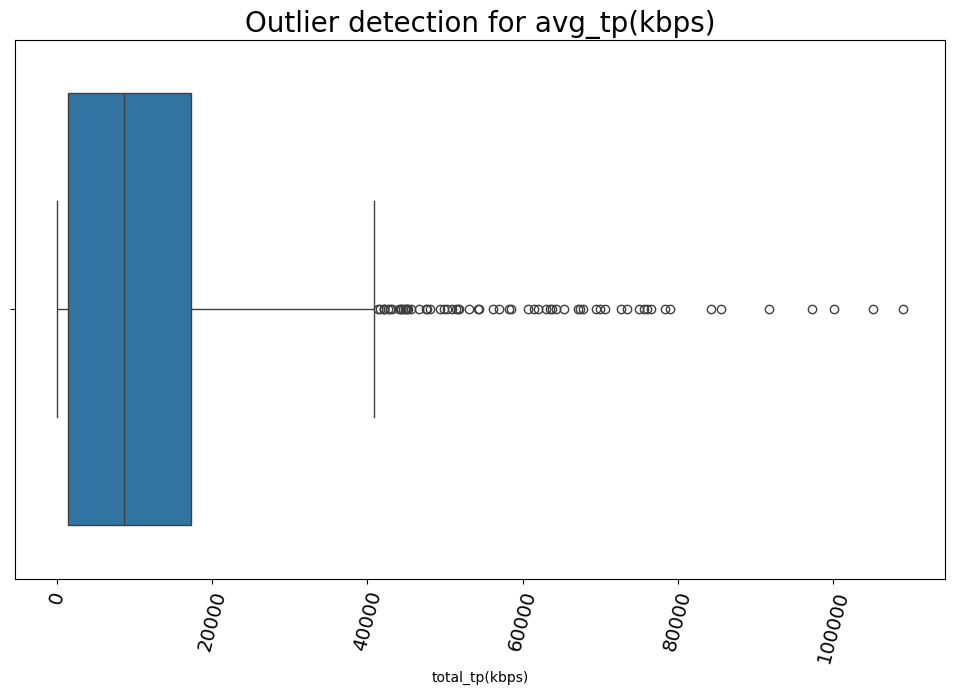

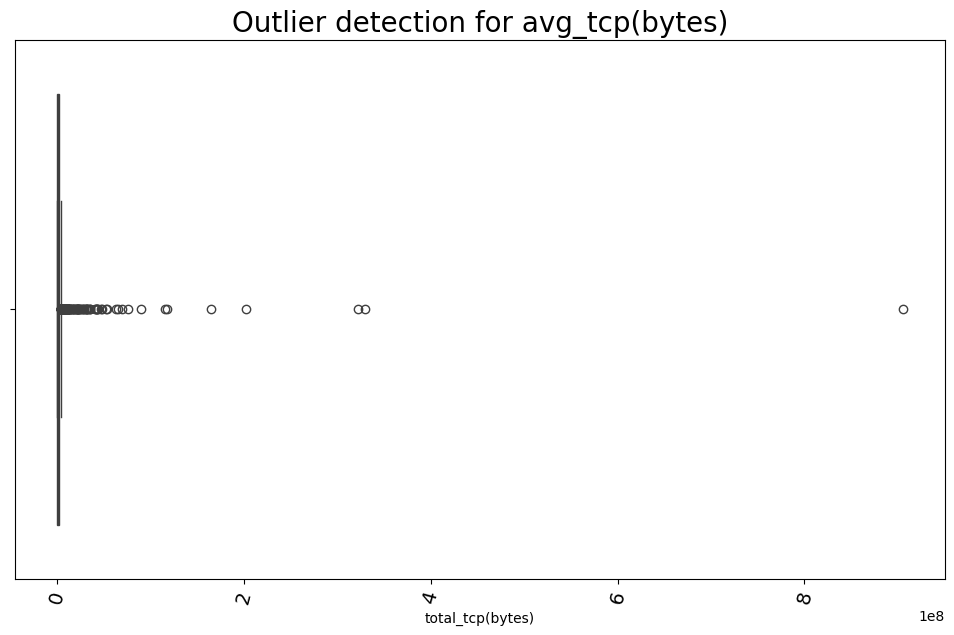

In [33]:
utility.plot_box(avg_by_handset_type,"total_tp(kbps)","Outlier detection for avg_tp(kbps)")
utility.plot_box(avg_by_handset_type,"total_tcp(bytes)","Outlier detection for avg_tcp(bytes)")

INFO:scripts.cleaner:handle_outliers executed successfully.
INFO:scripts.cleaner:handle_outliers executed successfully.
INFO:scripts.cleaner:handle_outliers executed successfully.


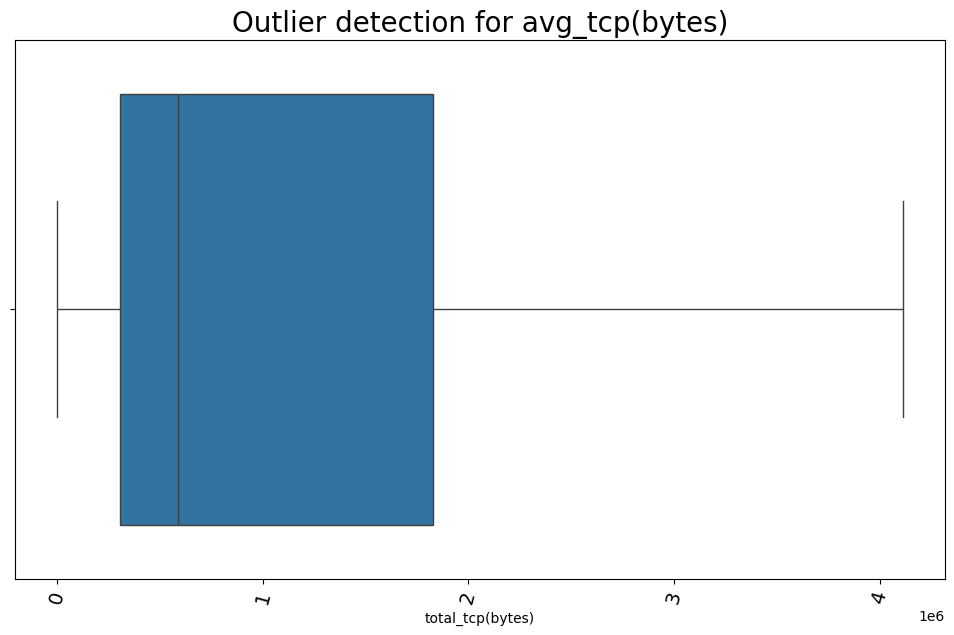

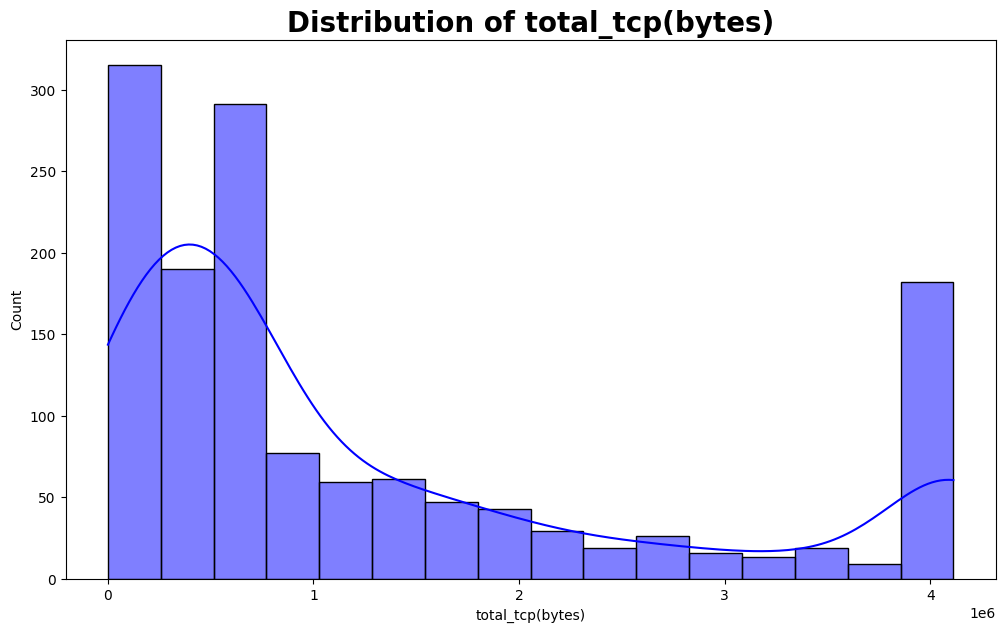

In [34]:
cleaned_per_handset = cleaner.handle_outliers(avg_by_handset_type, 'total_tp(kbps)')
cleaned_per_handset = cleaner.handle_outliers(cleaned_per_handset, 'total_tcp(bytes)')
cleaned_per_handset = cleaner.handle_outliers(cleaned_per_handset, 'total_rtt(ms)')

utility.plot_box(cleaned_per_handset, 'total_tcp(bytes)', 'Outlier detection for avg_tcp(bytes)')

utility.plot_hist(cleaned_per_handset, 'total_tcp(bytes)', 'blue')

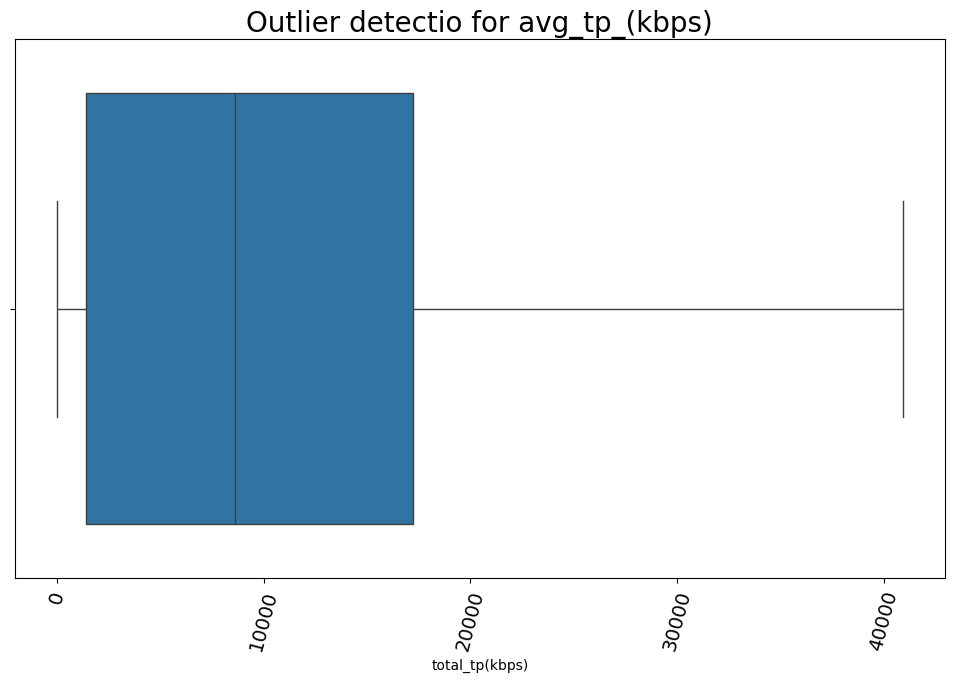

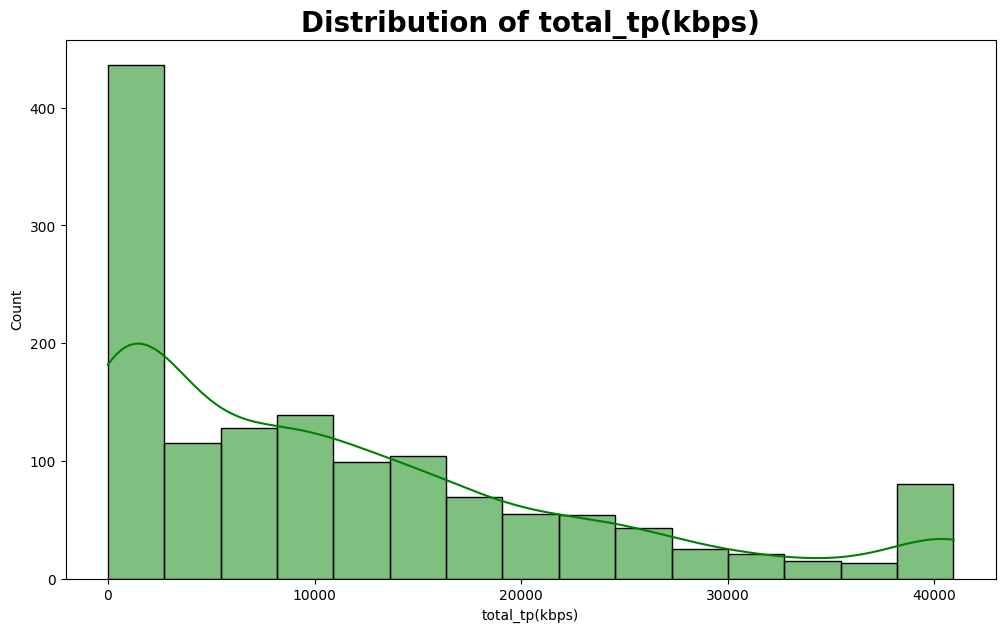

In [35]:
utility.plot_box(cleaned_per_handset, 'total_tp(kbps)', 'Outlier detectio for avg_tp_(kbps)')
utility.plot_hist(cleaned_per_handset, 'total_tp(kbps)','green')

#### Task 4.4
K-means clustering

In [39]:
kmeans= KMeans(
    init="k-means++",
    n_clusters= 3,
    n_init= 10,
    max_iter= 300,
    random_state=20  
)

In [40]:
normalized_experience_metric = cleaner.normalizer(user_experience_total)
normalized_experience_metric

INFO:scripts.cleaner:get_numerical_columns executed successfully.
INFO:scripts.cleaner:get_numerical_columns executed successfully.
INFO:scripts.cleaner:normalizer executed successfully.


,msisdn,total_rtt(ms),total_tp(kbps),total_tcp(bytes)
0,1.0,1.396110e-09,1.990200e-09,0.000018
1,1.0,2.078270e-09,1.246962e-09,0.000018
2,1.0,1.481015e-09,4.443045e-10,0.000017
3,1.0,1.481466e-09,2.607381e-09,0.000017
4,1.0,1.483689e-09,4.451066e-10,0.000017
...,...,...,...,...
149996,1.0,9.509464e-10,3.476898e-09,0.000018
149997,1.0,8.614684e-10,2.287347e-09,0.000018
149998,1.0,1.457384e-09,2.676827e-09,0.000018
149999,1.0,1.249270e-09,2.111862e-09,0.000018


In [41]:
model = kmeans.fit(normalized_experience_metric)
centroids = kmeans.cluster_centers_

In [42]:
with open("../models/experience_clustering_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [43]:
clustered_experience = user_experience_total.copy()
clustered_experience['cluster'] = model.predict(normalized_experience_metric)
clustered_experience.head()

,msisdn,handset_type,total_rtt(ms),total_tp(kbps),total_tcp(bytes),cluster
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,47.0,67.0,589679.5,0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),70.0,42.0,589679.5,0
2,3.376063e+10,Samsung Galaxy A8 (2018),50.0,15.0,589679.5,0
3,3.375034e+10,undefined,50.0,88.0,589679.5,0
4,3.369980e+10,Samsung Sm-G390F,50.0,15.0,589679.5,0


In [44]:
clustered = clustered_experience[["total_rtt(ms)","total_tp(kbps)","total_tcp(bytes)","cluster"]].groupby('cluster').agg(['min','max','mean','count','var','std'])
clustered

total_rtt(ms)                                                          \
                  min      max        mean   count            var         std   
cluster                                                                         
0                 0.0  96924.0  112.954079  149583  321084.667176  566.643333   
1                52.0    812.0  147.837349     166   11678.379445  108.066551   
2                39.0   2885.0  170.575397     252   44631.161623  211.260885   

        total_tp(kbps)                                                \
                   min       max          mean   count           var   
cluster                                                                
0                  0.0  382262.0  14920.545690  149583  7.105909e+08   
1              22336.0  226056.0  72114.644578     166  1.137570e+09   
2               2340.0  181839.0  66429.742063     252  1.019249e+09   

                      total_tcp(bytes)                                      \
                  std              min           max          mean   count   
cluster                                                                      
0        26656.911364     8.600000e+01  5.788109e+08  3.820350e+06  149583   
1        33727.875940     2.144277e+09  4.344116e+09  3.108384e+09     166   
2        31925.680666     5.857746e+08  2.127846e+09  1.160442e+09     252   

                                     
                  var           std  
cluster                              
0        4.737439e+14  2.176566e+07  
1        4.173524e+17  6.460282e+08  
2        1.906993e+17  4.366914e+08

In [49]:
# Aggregating statistics
clustered_stats = clustered_experience.groupby('cluster').agg(['min', 'max', 'mean', 'count', 'var', 'std'])

# Reshape the DataFrame for Plotly Express
clustered_stats = clustered_stats.stack(level=0).reset_index()

# Rename columns for better labels
clustered_stats.columns = ['cluster', 'metric', 'min', 'max', 'mean', 'count', 'var', 'std']

# Plotting
fig = px.bar(clustered_stats, x='cluster', y='mean', color='metric',
             error_y='std', text='mean',
             labels={'mean': 'Mean Value', 'metric': 'Metric'},
             title='Clustered Statistics',
             template='plotly_dark')  # Choose a dark template for a modern appearance

# Customize layout for better readability
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='Cluster', yaxis_title='Value', showlegend=True)
fig.update_layout(barmode='group', bargap=0.2)

# Show the plot
fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13664\3731259258.py:2: FutureWarning:

['handset_type'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Cluster 0
Users in cluster 0 have an intermediate experience. They have an experience which is closer to cluster 1 meaning they have an experience that is slightly worse than cluster 2.

Cluster 1
This cluster of users have the worst experience as compared to the other cluster. They have the highest RTT and TCP retransmission on average which indicates that there is less throughput. This can be confirmed by comparing the mean values. This cluster also contains the highest number of users.

Cluster 2
Users in cluster 2 have the best experience. They have less delay(smaller RTT) and also less tcp retransmission which indicates that the majority of the traffic is successfully sent and recieved. This means there is high throughput and this can be confirmed by the mean values. This cluster contains the smallest number of users.

In [52]:
distance = kmeans.fit_transform(normalized_experience_metric)

distance_from_less_exp = list(map(lambda x : x[0], distance))

experience_metrics_with_cluster = user_experience_total2
experience_metrics_with_cluster['score'] = distance_from_less_exp

In [53]:
experience_metrics_with_cluster.head()

,msisdn,handset_type,total_rtt(ms),total_tp(kbps),total_tcp(bytes),score
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,47.0,67.0,589679.5,0.000096
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),70.0,42.0,589679.5,0.000096
2,3.376063e+10,Samsung Galaxy A8 (2018),50.0,15.0,589679.5,0.000096
3,3.375034e+10,undefined,50.0,88.0,589679.5,0.000096
4,3.369980e+10,Samsung Sm-G390F,50.0,15.0,589679.5,0.000096


In [54]:
agg_data = {}
agg_data['top_10_tcp'] = top_10_tcp
agg_data['bottom_10_tcp'] = bottom_10_tcp
agg_data['top_10_rtt'] = top_10_rtt
agg_data['bottom_10_rtt'] = bottom_10_rtt
agg_data['top_10_tp'] = top_10_tp
agg_data['bottom_10_tp'] = bottom_10_tp
agg_data['cluster'] = clustered
pickle.dump(agg_data, open('../data/experience_data.pkl', 'wb'))

In [55]:
db_params = {
        'dbname': 'week-1',
        'user': 'postgres',
        'password': 'postgres',
        'host': 'localhost',
        'port': '5432',
    }
conn = connect_to_database(db_params)
# Create a SQLAlchemy engine
engine = create_engine(f"postgresql+psycopg2://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['dbname']}")

# Specify the table name
table_name = 'experience_metric'

# Use pandas to_sql method to insert the data into PostgreSQL
experience_metrics_with_cluster.to_sql(table_name, engine, if_exists='replace', index=False)

# Close the database connection
conn.close()

INFO:data.load_data_from_sql:connect_to_database executed successfully.
